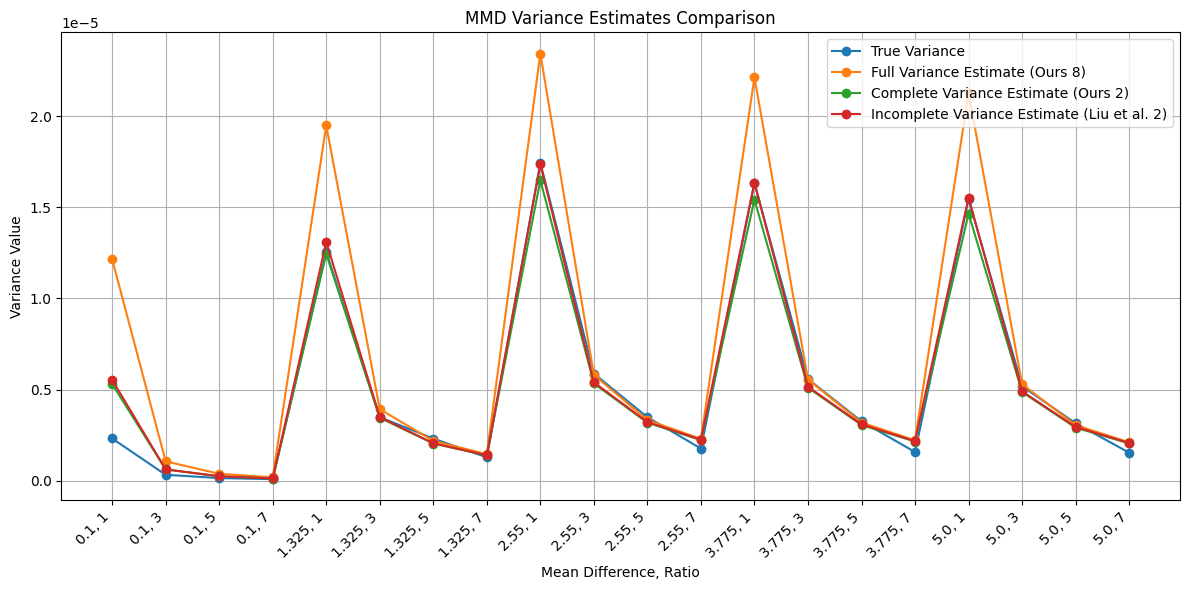

In [3]:
import json
import matplotlib.pyplot as plt

def plot_results_from_json(filename):
    # Load results
    with open(filename, 'r') as f:
        results = json.load(f)

    # Extract data for plotting
    x = [key for key in results.keys()]
    true_variances = [val['true_variance'] for val in results.values()]
    full_variance_estimates = [val['full_variance_estimate'] for val in results.values()]
    complete_variance_estimates = [val['complete_variance_estimate'] for val in results.values()]
    incomplete_variance_estimates = [val['incomplete_variance_estimate'] for val in results.values()]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(x, true_variances, marker='o', label='True Variance')
    plt.plot(x, full_variance_estimates, marker='o', label='Full Variance Estimate (Ours 8)')
    plt.plot(x, complete_variance_estimates, marker='o', label='Complete Variance Estimate (Ours 2)')
    plt.plot(x, incomplete_variance_estimates, marker='o', label='Incomplete Variance Estimate (Liu et al. 2)')
    
    # Formatting the plot
    plt.title('MMD Variance Estimates Comparison')
    plt.xlabel('Mean Difference, Ratio')
    plt.ylabel('Variance Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function
plot_results_from_json("mmd_results_100.json")


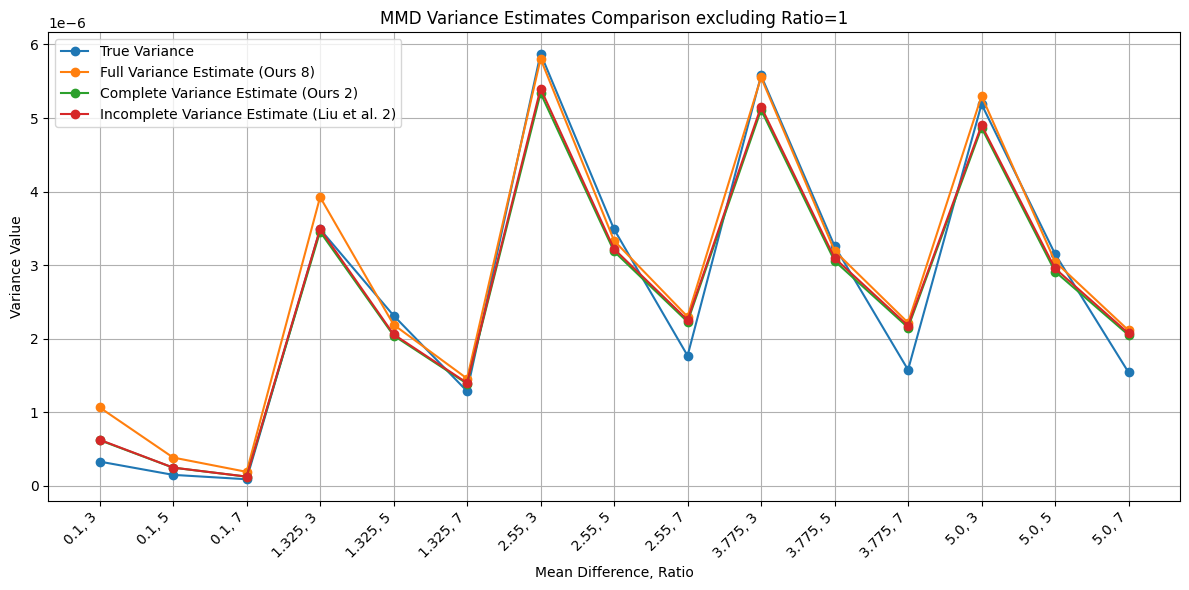

In [4]:
def plot_results_filtered(filename):
    # Load results
    with open(filename, 'r') as f:
        results = json.load(f)

    # Extract data for plotting, and filter out results where ratio equals 1
    x = [key for key, value in results.items() if int(key.split(',')[1].strip(')')) != 1]
    true_variances = [val['true_variance'] for key, val in results.items() if int(key.split(',')[1].strip(')')) != 1]
    full_variance_estimates = [val['full_variance_estimate'] for key, val in results.items() if int(key.split(',')[1].strip(')')) != 1]
    complete_variance_estimates = [val['complete_variance_estimate'] for key, val in results.items() if int(key.split(',')[1].strip(')')) != 1]
    incomplete_variance_estimates = [val['incomplete_variance_estimate'] for key, val in results.items() if int(key.split(',')[1].strip(')')) != 1]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(x, true_variances, marker='o', label='True Variance')
    plt.plot(x, full_variance_estimates, marker='o', label='Full Variance Estimate (Ours 8)')
    plt.plot(x, complete_variance_estimates, marker='o', label='Complete Variance Estimate (Ours 2)')
    plt.plot(x, incomplete_variance_estimates, marker='o', label='Incomplete Variance Estimate (Liu et al. 2)')
    
    # Formatting the plot
    plt.title('MMD Variance Estimates Comparison excluding Ratio=1')
    plt.xlabel('Mean Difference, Ratio')
    plt.ylabel('Variance Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function
plot_results_filtered("mmd_results_100.json")


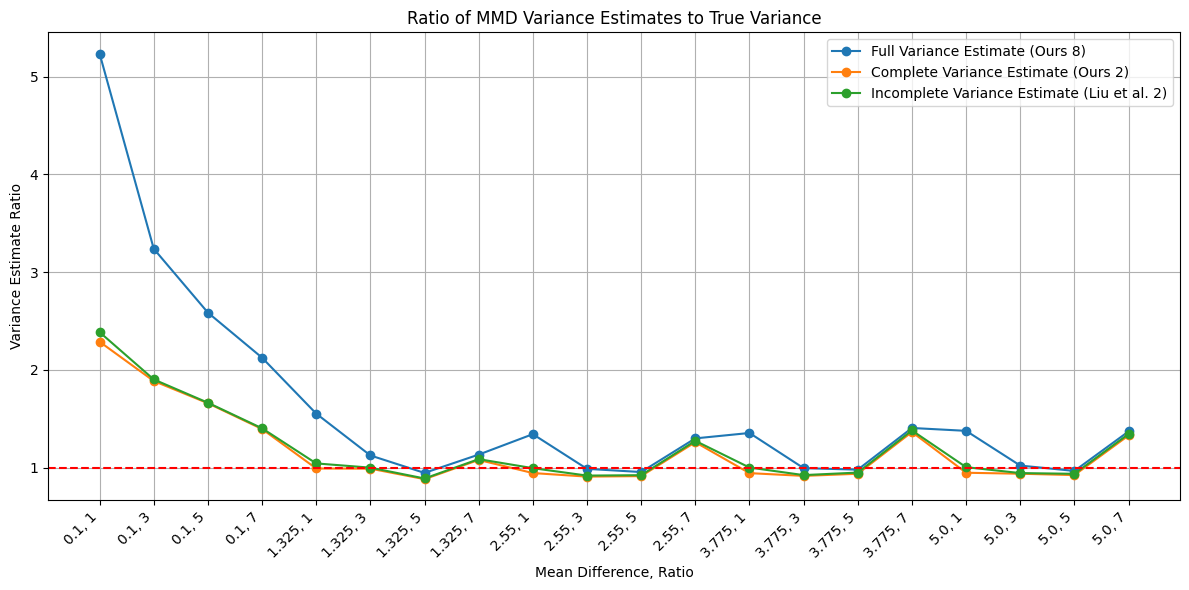

In [8]:
import matplotlib.pyplot as plt
import json

def plot_variance_ratio(filename):
    # Load results
    with open(filename, 'r') as f:
        results = json.load(f)

    # Extract data for plotting
    x = [key for key, value in results.items()]
    true_variances = [val['true_variance'] for key, val in results.items()]
    
    # Calculate variance ratios
    full_variance_ratios = [val['full_variance_estimate']/tv for val, tv in zip(results.values(), true_variances)]
    complete_variance_ratios = [val['complete_variance_estimate']/tv for val, tv in zip(results.values(), true_variances)]
    incomplete_variance_ratios = [val['incomplete_variance_estimate']/tv for val, tv in zip(results.values(), true_variances)]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(x, full_variance_ratios, marker='o', label='Full Variance Estimate (Ours 8) ')
    plt.plot(x, complete_variance_ratios, marker='o', label='Complete Variance Estimate (Ours 2)')
    plt.plot(x, incomplete_variance_ratios, marker='o', label='Incomplete Variance Estimate (Liu et al. 2)')
    
    # Formatting the plot
    plt.title('Ratio of MMD Variance Estimates to True Variance')
    plt.xlabel('Mean Difference, Ratio')
    plt.ylabel('Variance Estimate Ratio')
    plt.grid(True)
    plt.legend()
    plt.axhline(y=1, color='red', linestyle='--') # This line indicates where the estimates would match the true variance
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function
plot_variance_ratio("mmd_results_100.json")


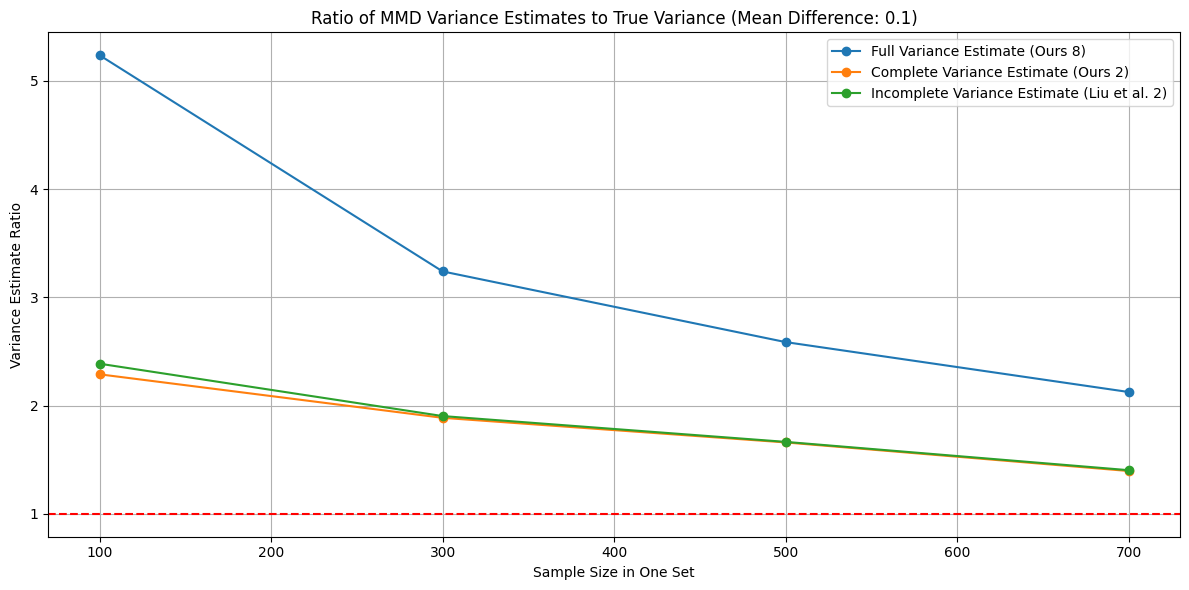

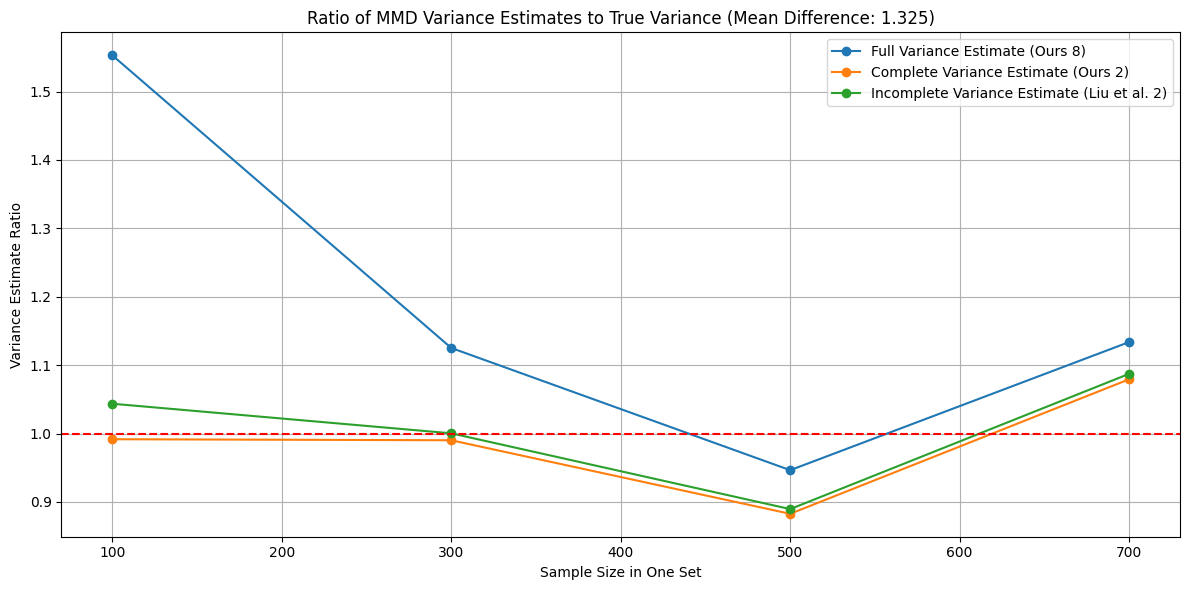

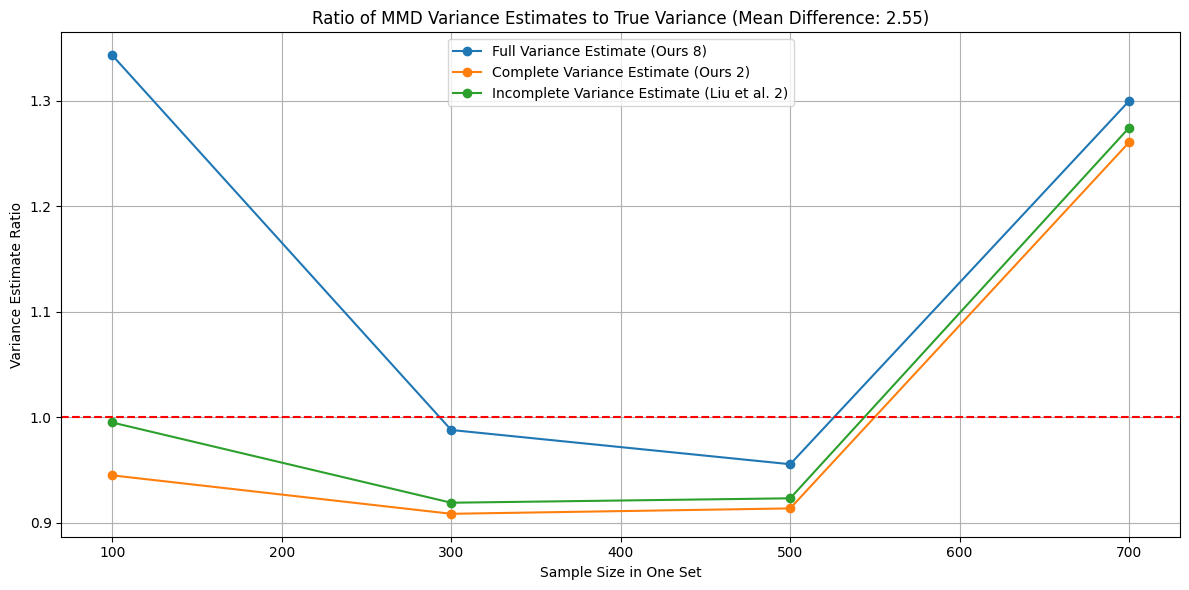

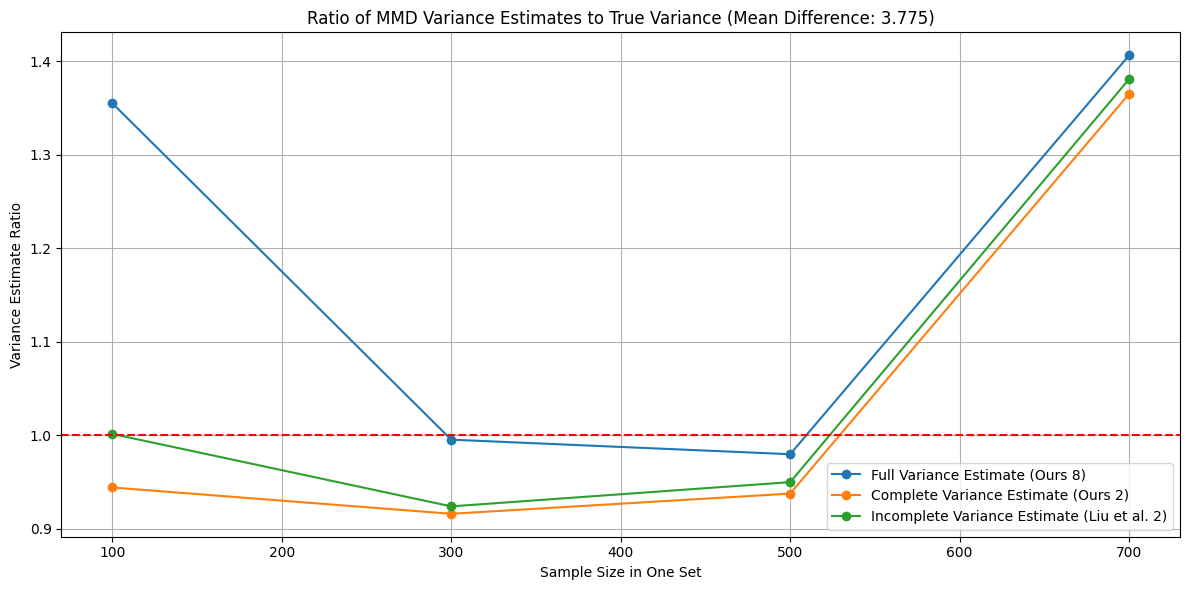

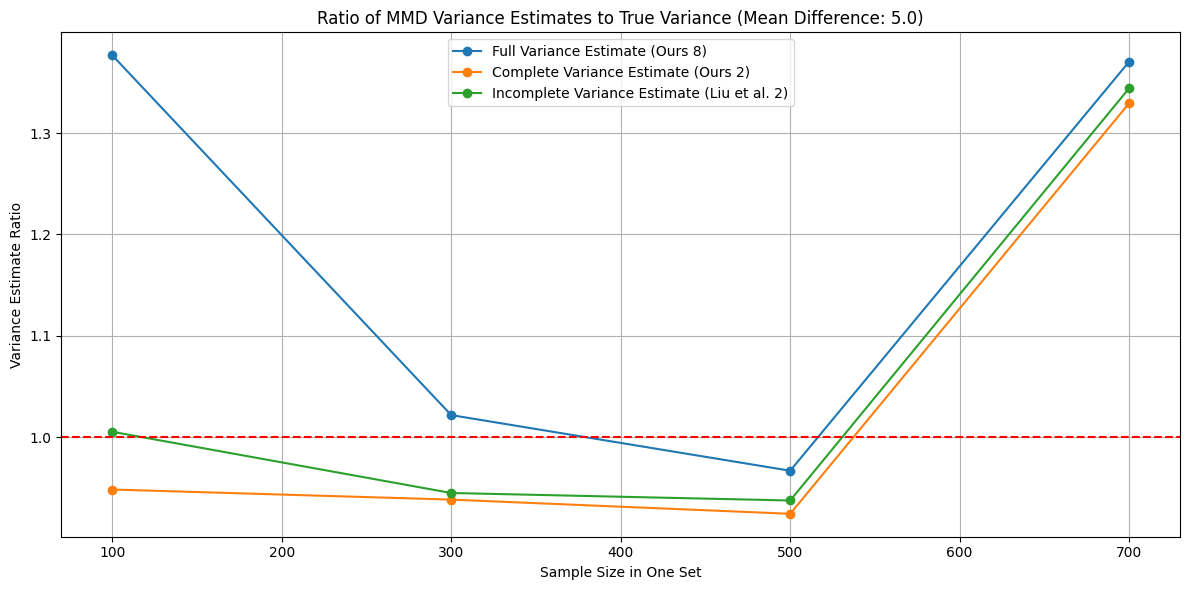

In [14]:
import matplotlib.pyplot as plt
import json

def plot_variance_ratio(filename, n_samples):
    # Load results
    with open(filename, 'r') as f:
        results = json.load(f)

    # Group by Mean Difference
    grouped_results = {}
    for key, value in results.items():
        mean_diff, ratio = eval(key)
        if mean_diff not in grouped_results:
            grouped_results[mean_diff] = {}
        grouped_results[mean_diff][ratio] = value

    for mean_diff, data in grouped_results.items():
        ratios = [ratio * n_samples for ratio in list(data.keys())]  # Multiply each ratio by n_samples
        true_variances = [val['true_variance'] for val in data.values()]
        
        # Calculate variance ratios
        full_variance_ratios = [val['full_variance_estimate']/tv for val, tv in zip(data.values(), true_variances)]
        complete_variance_ratios = [val['complete_variance_estimate']/tv for val, tv in zip(data.values(), true_variances)]
        incomplete_variance_ratios = [val['incomplete_variance_estimate']/tv for val, tv in zip(data.values(), true_variances)]

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(ratios, full_variance_ratios, marker='o', label='Full Variance Estimate (Ours 8)')
        plt.plot(ratios, complete_variance_ratios, marker='o', label='Complete Variance Estimate (Ours 2)')
        plt.plot(ratios, incomplete_variance_ratios, marker='o', label='Incomplete Variance Estimate (Liu et al. 2)')
        
        # Formatting the plot
        plt.title(f'Ratio of MMD Variance Estimates to True Variance (Mean Difference: {mean_diff})')
        plt.xlabel('Sample Size in One Set') 
        plt.ylabel('Variance Estimate Ratio')
        plt.grid(True)
        plt.legend()
        plt.axhline(y=1, color='r', linestyle='--') # Indicates perfect match with true variance
        plt.tight_layout()

    # Display the plots
    plt.show()

# Call the function
plot_variance_ratio("mmd_results_100.json", 100)


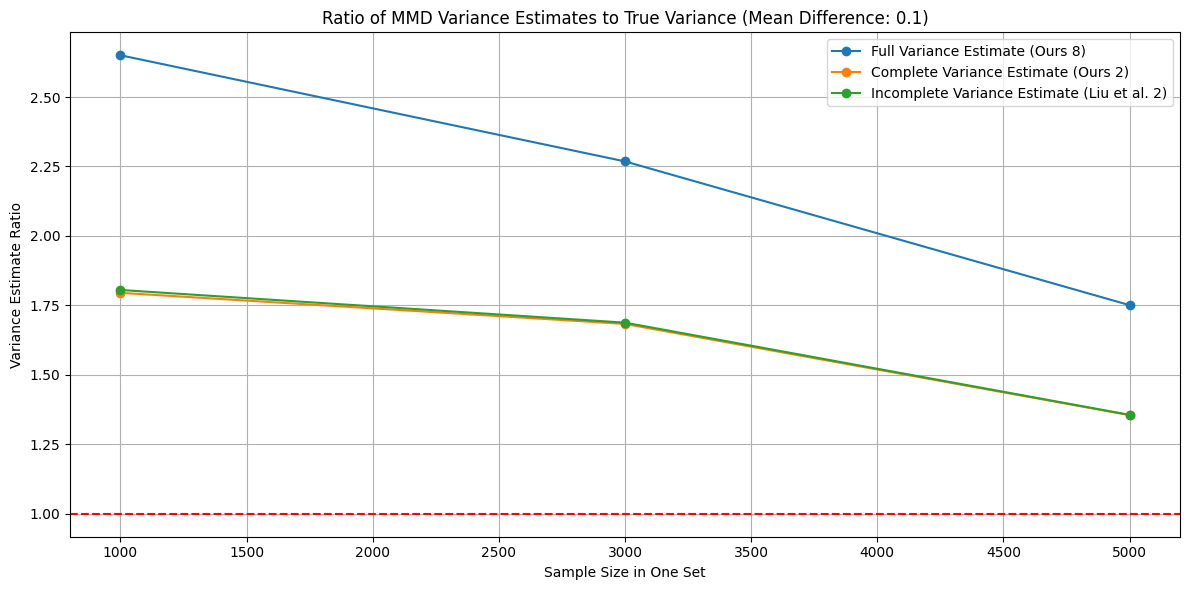

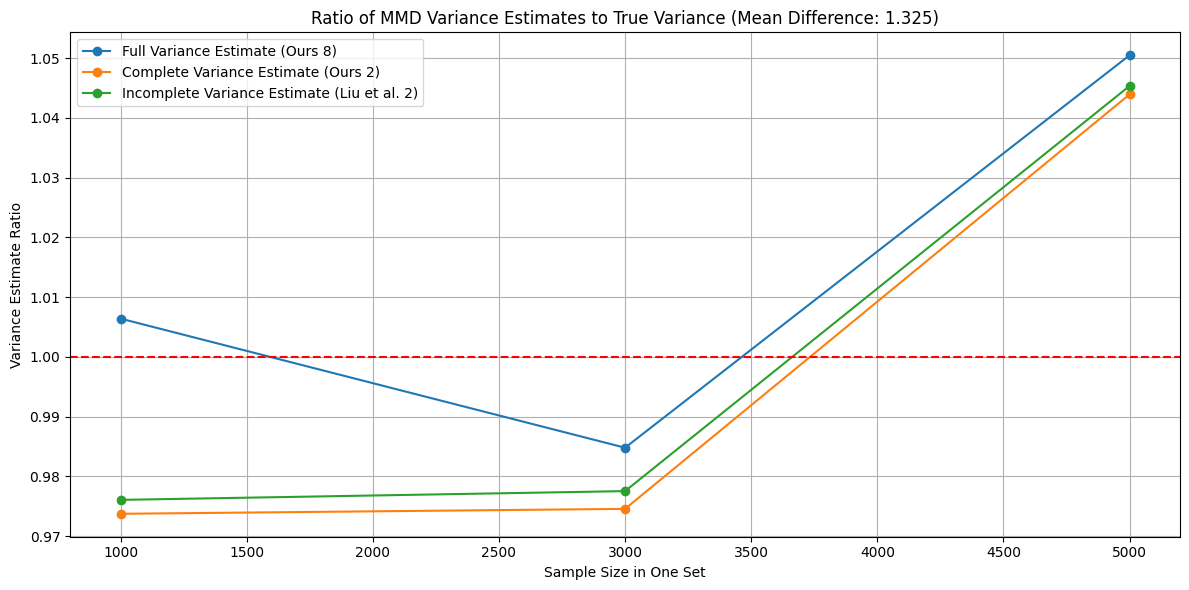

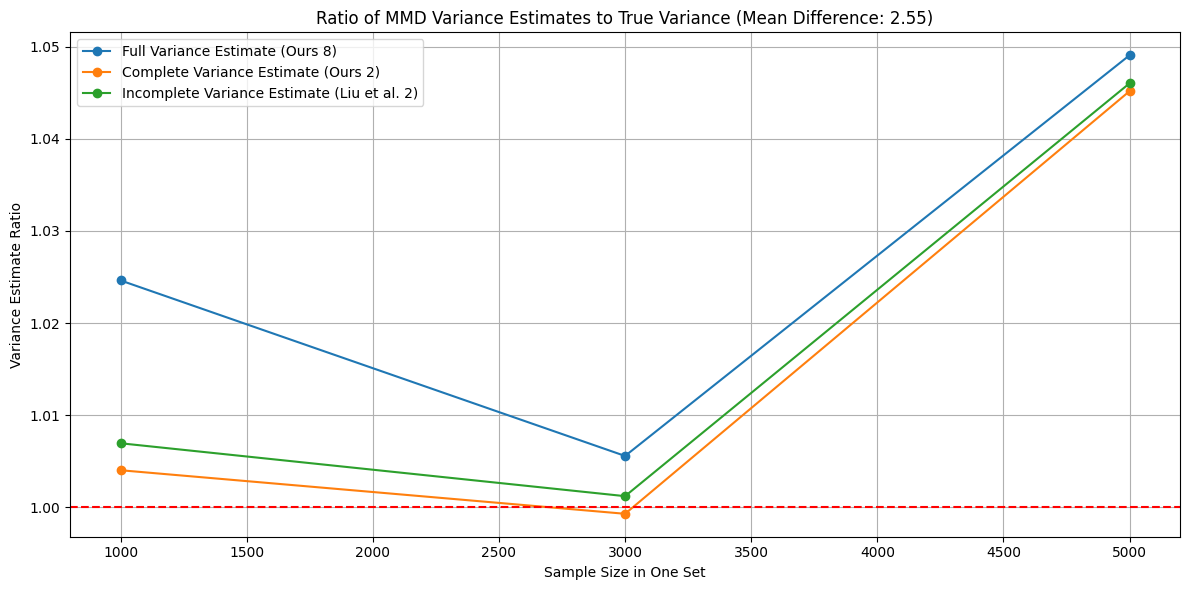

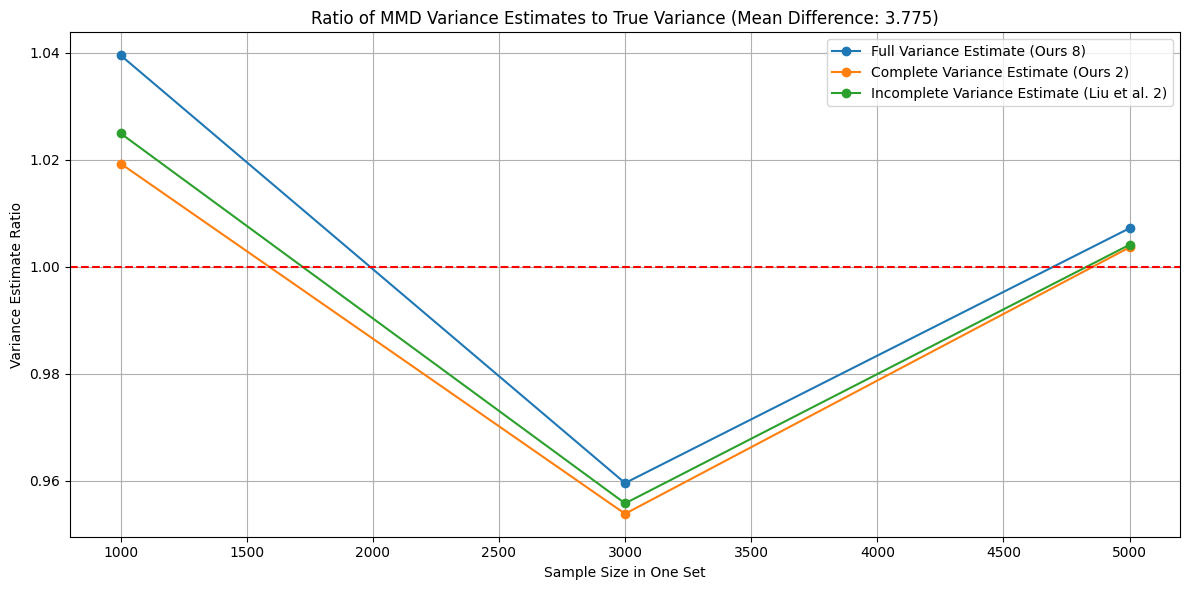

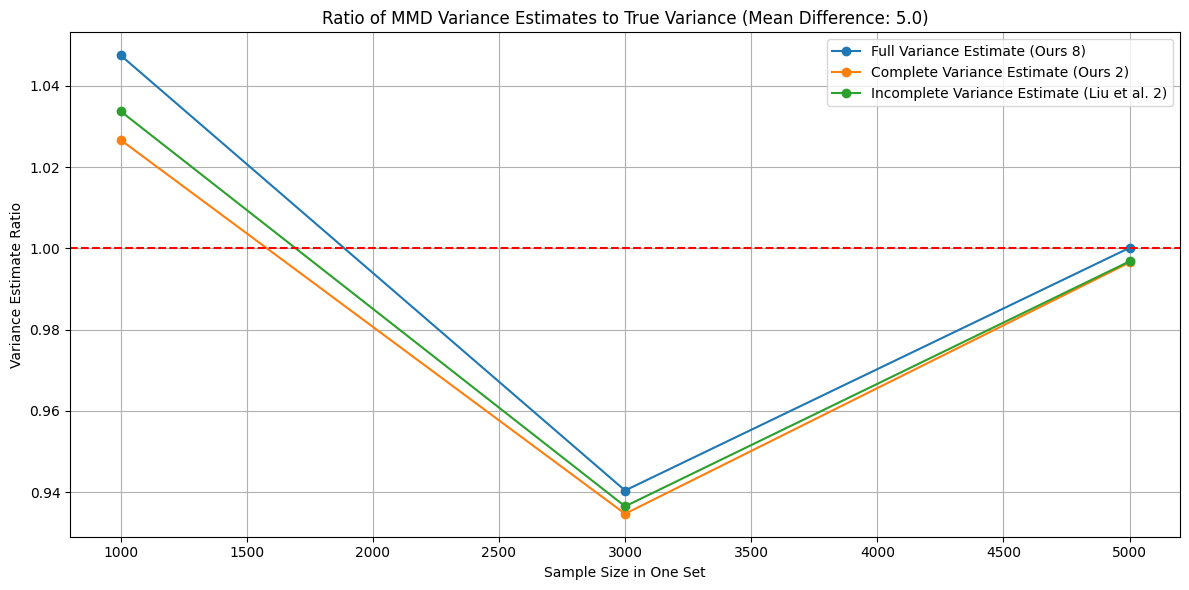

In [15]:
plot_variance_ratio("mmd_results_1000.json", 1000)

In [16]:
2.846978685316983e-07 /2.8466110137558694e-07

1.0001291611531526